In [1]:
import pandas_datareader as pdr

In [7]:
import pandas
import numpy as np
import matplotlib
import datetime

In [8]:
MSFT = pdr.get_data_yahoo('MSFT', start = '2010, 1, 1', end = '2020, 1, 1')

In [9]:
MSFT.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,23.904985
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,23.912704
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.765953
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.518797
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.680992


In [15]:
index = ['MSFT', 'AAPL', 'PG']
data_comparison = pandas.DataFrame()
for i in index:
    data_comparison[i] = pdr.get_data_yahoo(i, start = '2010, 1, 1', end = '2021, 1, 1')['Adj Close']

In [16]:
data_comparison.head(5)

,MSFT,AAPL,PG
Date,,,
2010-01-04,23.904982,6.553026,42.240341
2010-01-05,23.912706,6.564354,42.254143
2010-01-06,23.765959,6.459939,42.053722
2010-01-07,23.518799,6.447997,41.825665
2010-01-08,23.680992,6.490867,41.770374


<AxesSubplot:xlabel='Date'>

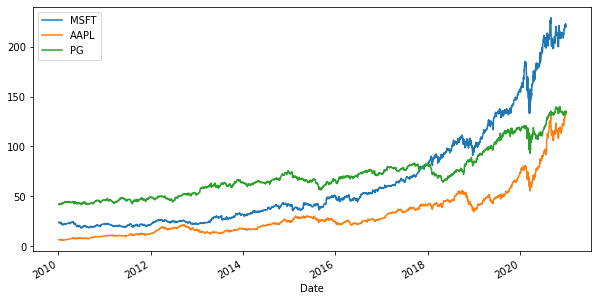

In [17]:
data_comparison.plot(figsize = (10, 5))

In [18]:
MSFT

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,23.904985
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,23.912704
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.765953
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.518797
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.680992
...,...,...,...,...,...,...
2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,154.435730
2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,155.701584
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,155.986176


In [20]:
MSFT['simple returns'] = (MSFT['Adj Close']/MSFT['Adj Close'].shift(1))-1

<AxesSubplot:xlabel='Date'>

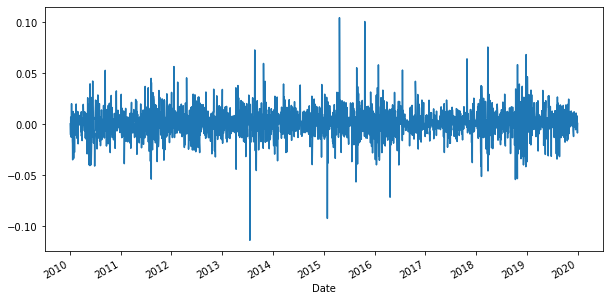

In [21]:
MSFT['simple returns'].plot(figsize = (10, 5))

In [22]:
daily_avg_simple = MSFT['simple returns'].mean()
daily_avg_simple

0.0008452286337661341

In [23]:
annual_avg_simple = daily_avg_simple*250
annual_avg_simple

0.21130715844153353

In [24]:
MSFT['log returns'] = np.log(MSFT['Adj Close']/MSFT['Adj Close'].shift(1))

In [25]:
MSFT

,High,Low,Open,Close,Volume,Adj Close,simple returns,log returns
Date,,,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,23.904985,NaN,NaN
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,23.912704,0.000323,0.000323
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.765953,-0.006137,-0.006156
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.518797,-0.010400,-0.010454
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.680992,0.006896,0.006873
...,...,...,...,...,...,...,...,...
2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,154.435730,-0.000191,-0.000191
2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,155.701584,0.008197,0.008163
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,155.986176,0.001828,0.001826


In [29]:
graph = (data_comparison/data_comparison.iloc[0])

<AxesSubplot:xlabel='Date'>

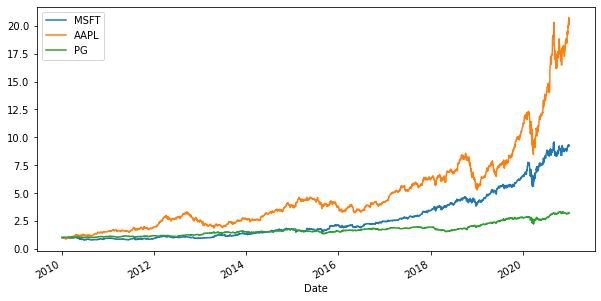

In [30]:
graph.plot(figsize = (10, 5))

Week 2 - Risk

In [3]:
ticker = ['AAPL', 'MSFT', 'PG']

In [4]:
index_data = pandas.DataFrame()
for i in ticker:
    index_data[i] = pdr.get_data_yahoo(i, start = '2016, 1, 1')['Adj Close']

In [5]:
index_data

,AAPL,MSFT,PG
Date,,,
2016-01-04,24.251438,49.591049,65.451416
2016-01-05,23.643709,49.817295,65.660210
2016-01-06,23.181011,48.912346,65.025497
2016-01-07,22.202665,47.211040,64.457588
2016-01-08,22.320068,47.355846,63.447048
...,...,...,...
2022-01-27,159.220001,299.839996,159.130005
2022-01-28,170.330002,308.260010,160.500000
2022-01-31,174.779999,310.980011,160.449997


In [8]:
weights = np.array([0.7, 0.2, 0.1])

In [9]:
returns = (index_data/index_data.shift(1))-1

In [11]:
annual_returns = returns.mean()*250

In [12]:
annual_returns

AAPL    0.365265
MSFT    0.335806
PG      0.166049
dtype: float64

In [14]:
portfolio_return = np.dot(annual_returns, weights)

In [15]:
log_returns = np.log(index_data/index_data.shift(1))

In [16]:
log_returns

,AAPL,MSFT,PG
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,-0.025379,0.004552,0.003185
2016-01-06,-0.019764,-0.018332,-0.009714
2016-01-07,-0.043121,-0.035402,-0.008772
2016-01-08,0.005274,0.003063,-0.015802
...,...,...,...
2022-01-27,-0.002948,0.010494,0.006178
2022-01-28,0.067451,0.027695,0.008572
2022-01-31,0.025790,0.008785,-0.000312


In [18]:
index_data[['MSFT', 'AAPL']].std()*250**0.5

MSFT    1293.578839
AAPL     685.465216
dtype: float64

In [19]:
index_data['AAPL'].var()

1879.450251010758

In [20]:
index_data[['AAPL', 'MSFT']].cov()

,AAPL,MSFT
AAPL,1879.450251,3483.380307
MSFT,3483.380307,6693.384852


In [21]:
index_data.corr()

,AAPL,MSFT,PG
AAPL,1.000000,0.982116,0.933025
MSFT,0.982116,1.000000,0.949444
PG,0.933025,0.949444,1.000000


Portfolio Variance

In [24]:
weightsT = np.array([0.6, 0.3])

In [26]:
output = np.dot(index_data[['AAPL', 'MSFT']].cov()*250, weightsT)

In [27]:
np.dot(weightsT.T, output)

633255.9093696934

In [28]:
weights = np.array([0.7, 0.2, 0.1])

In [29]:
np.dot(weights.T, np.dot(index_data.cov(), weights))

2409.283230284622

In [35]:
index = ['AAPL', '^GSPC']
data = pandas.DataFrame()
for i in index:
    data[i] = pdr.get_data_yahoo(i, start = '2016, 1, 1')['Adj Close']

<AxesSubplot:xlabel='Date'>

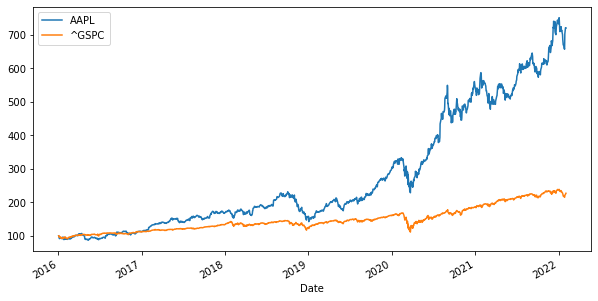

In [36]:
(data/data.iloc[0]*100).plot(figsize = (10,5))

In [37]:
sec_returns = np.log(data/data.shift(1))

In [39]:
cov = sec_returns.cov()*250

In [40]:
cov_with_market = cov.iloc[0,1]

In [41]:
market_variance = sec_returns['^GSPC'].var()*250

In [42]:
Beta = cov_with_market/market_variance

Simple expected return

In [43]:
simple_expected = (0.025 + Beta*(0.072 - 0.025))

In [44]:
(simple_expected - 0.025)/(sec_returns['AAPL'].std()*250**0.5)

0.1910260525933768

Efficient frontier

In [47]:
num_assets = len(ticker)

In [48]:
log_returns = np.log(index_data/index_data.shift(1))

In [54]:
portfolio_returns = []
portfolio_volatilities = []

for i in range(10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
    
    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

portfolio_returns, portfolio_volatilities

(array([0.27191269, 0.24675766, 0.25482383, ..., 0.24480599, 0.23527288,
        0.20355077]),
 array([0.22314067, 0.20713176, 0.2123662 , ..., 0.20164408, 0.19599222,
        0.18408843]))

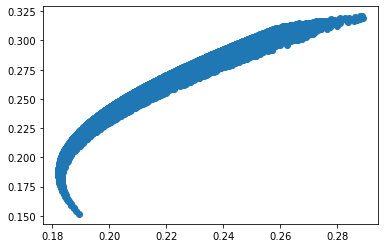

In [55]:
matplotlib.pyplot.scatter(portfolio_volatilities, portfolio_returns)